# Steps
- `import gym`
- `make("<task_name>")` to create the env
- `env.reset()` to reset the env, set steps to 0 and returns the env
- Create a loop to run for n timesteps
    - Create an action with `env.action_space.sample()` which takes a random action from the available actions
    - `env.step(action)` to run the simulation for 1 time step
- `env.close()` to close the env

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt

2024-01-21 13:15:12.855620: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-21 13:15:16.038480: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
env = gym.make("CartPole-v1", render_mode="human")

In [3]:
episodes = 25
epi_score = []
step_score = []

## 2a,b) Implement CartPole for number of steps and episodes.

In [4]:
for i in range(episodes):
    obs, info = env.reset()
    truncated = False
    terminated = False
    cum_reward = 0

    step_score.append([])

    while not terminated and not truncated:
    # while not terminated:
    # for j in range(20):
        env.render()
        action = env.action_space.sample()

        obs, reward, terminated, truncated, info = env.step(action)
        cum_reward += reward
        step_score[i].append(cum_reward)

    epi_score.append(cum_reward)
env.close()

## 2d) Cumulative rewards for 50 episodes

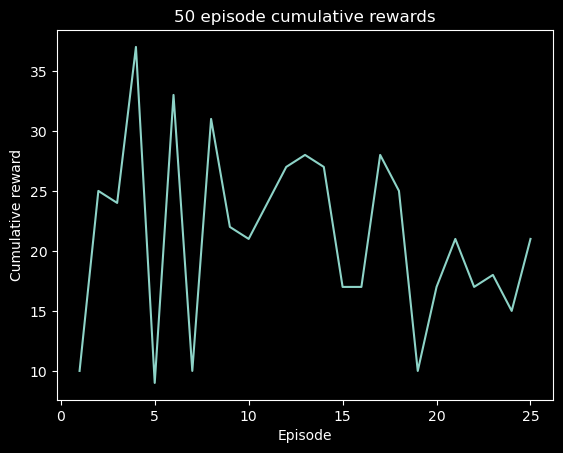

In [5]:
plt.title("50 episode cumulative rewards")
plt.xlabel("Episode")
plt.ylabel("Cumulative reward")
plt.plot(range(1,len(epi_score) + 1), epi_score)
plt.show()

## 2d) Cumulative rewards for timesteps of 1st episode

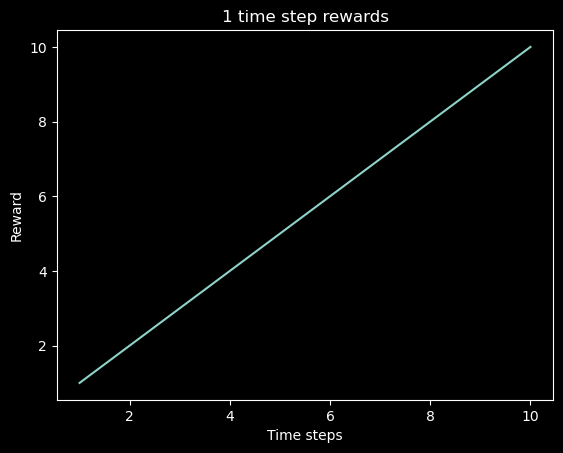

In [6]:
plt.title("1 time step rewards")
plt.xlabel("Time steps")
plt.ylabel("Reward")
plt.plot(range(1,len(step_score[0]) + 1), step_score[0])
plt.show()

## 2c) Comment on rewards per approach
We see that, the episodic approach results in varied cumulative reward for a number of time steps per episode and hence results in a random amount per episode. This is mainly due to the stochastic nature of choosing the actions - aka sampling from the action space which results in varied time required till the termination of the particular episode

In the case of the time step approach, we see that the graph is linear and rising because the reward can only be accumulated and not lost and hence as long as the conditions are met, the reward is incremented per time step till termination.